## Gaussian mixture models for going to the pub
In the video lecture we saw that the Wetherspoons on Park St has visiting times on a Sunday that look as if they can be well modelled by a mixture of Gaussians. Let's look into how we model that.
<img src="restaurant.png" alt="drawing" width="500"/>


In [26]:
from sklearn.linear_model import LinearRegression;

x = np.array([157, 160, 167, 168, 175, 180, 186, 189, 196, 200]).reshape(-1, 1);
y = np.array([40.4, 37.9, 39.5, 39.1, 35.5, 36.9, 34.8, 33.1, 31.9, 33]).reshape(-1, 1);

lr = LinearRegression().fit(x, y);
lr.coef_

array([[-0.18762804]])

In [27]:
lr.intercept_

array([69.57026511])

In [1]:
import numpy as np;
from scipy.stats import norm;

In [3]:
def entropy(p):
    return -1*p*np.log2(p);

In [20]:
entropy(5/8)+entropy(3/8)

0.954434002924965

In [7]:
entropy(1/4)+entropy(3/4)

0.8112781244591328

In [8]:
0.25+0.918*(3/8)*2 # Subject

0.9385

In [9]:
0.918*(3/8)+0.971*(5/8) # Style

0.951125

In [10]:
0+0.811*(1/2)+0.918*(3/8) # Colour

0.74975

In [7]:
entropy(1/2)*2

1.0

In [9]:
(entropy(2/3)+entropy(1/3))*3/8

0.3443609377704336

In [2]:
x1 = [2.20,2.04,1.95,1.79,1.91];
y1 = [1.99, 2.19, 2.23, 2.22, 2.58];
x2 = [2.31, 2.49, 2.94, 2.20, 1.97];
y2 = [2.53, 2.20, 1.88, 2.68, 2.93];
x3 = [1.02, 1.54, 0.82, 2.93, 0.76];
y3 = [1.15, 0.95, 1.05, 0.97, 1.10];

p1 = norm.logpdf(2.1, loc=np.mean(x1), scale=np.std(x1)) + np.log(1/3) + norm.logpdf(2.3, loc=np.mean(y1), scale=np.std(y1));
p2 = norm.logpdf(2.1, loc=np.mean(x2), scale=np.std(x2)) + np.log(1/3) + norm.logpdf(2.3, loc=np.mean(y2), scale=np.std(y2));
p3 = norm.logpdf(2.1, loc=np.mean(x3), scale=np.std(x3)) + np.log(1/3) + norm.logpdf(2.3, loc=np.mean(y3), scale=np.std(y3));

In [2]:
x1 = [1.52,1.46,1.68,1.47,1.53,1.6];
y1 = [1.95,1.76,2.11,2.08,1.94,1.97];
x2 = [2.04,1.78,1.67,1.82,1.65];
y2 = [2.24,2.69,2.66,2.43,2.9];
x3 = [2.15,1.55,2.92,1.23];
y3 = [1.04,1.08,0.84,0.85];

In [23]:
np.mean(y1), np.std(y1)

(1.9683333333333335, 0.11334558757279535)

In [26]:
def gaussian(x, mu, std):
    return np.power(np.e, (-1/2)*((x-mu)/std)**2)/(std*np.sqrt(2*np.pi));

In [28]:
p11 = gaussian(2.0, np.mean(x1), np.std(x1));
p12 = gaussian(2.1, np.mean(y1), np.std(y1));
l1 = np.log(2/5)+np.log(p11)+np.log(p12);
l1

-16.58787118328581

In [30]:
p11 = norm.pdf(2.0, loc=np.mean(x1), scale=np.std(x1));
p12 = norm.pdf(2.1, loc=np.mean(y1), scale=np.std(y1));
l1 = np.log(2/5)+np.log(p11)+np.log(p12);
l1

-16.58787118328581

In [11]:
p21 = norm.pdf(2.0, loc=np.mean(x2), scale=np.std(x2));
p22 = norm.pdf(2.1, loc=np.mean(y2), scale=np.std(y2));
l2 = np.log(1/3)+np.log(p21)+np.log(p22);
l2

-2.8587972246847793

In [14]:
p21 = norm.logpdf(2.0, loc=np.mean(x2), scale=np.std(x2));
p22 = norm.logpdf(2.1, loc=np.mean(y2), scale=np.std(y2));
l2 = np.log(1/3)+p21+p22
l2

-2.8587972246847793

In [12]:
p31 = norm.pdf(2.0, loc=np.mean(x3), scale=np.std(x3));
p32 = norm.pdf(2.1, loc=np.mean(y3), scale=np.std(y3));
l3 = np.log(4/15)+np.log(p31)+np.log(p32);
l3

-56.442947368638386

In [15]:
p31 = norm.logpdf(2.0, loc=np.mean(x3), scale=np.std(x3));
p32 = norm.logpdf(2.1, loc=np.mean(y3), scale=np.std(y3));
l3 = np.log(4/15)+p31+p32
l3

-56.442947368638386

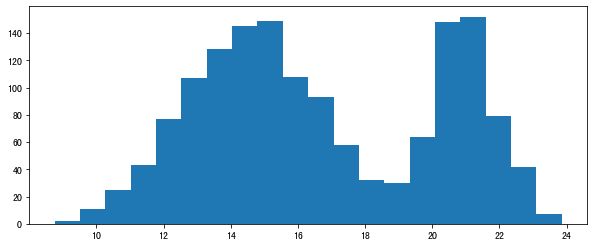

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from numpy.random import default_rng

rng=default_rng(100)

x1 = rng.normal(loc=14.5, scale=2, size=1000)
x2 = rng.normal(loc=21, scale=1, size=500)
x=np.hstack([x1, x2])
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patch = plt.hist(x, bins=20)

bin_length=bins[1]-bins[0]
sf1=bin_length*len(x1)
sf2=bin_length*len(x2)



We first make a guess at the means and the standard deviation. Let's guess that the mean of one cluster is 14 (i.e.  2 pm) and that the mean of the other cluster is 20 (i.e. 8 pm), and that the standard deviation of each is 1. Let's also say that each cluster has weight 0.5.

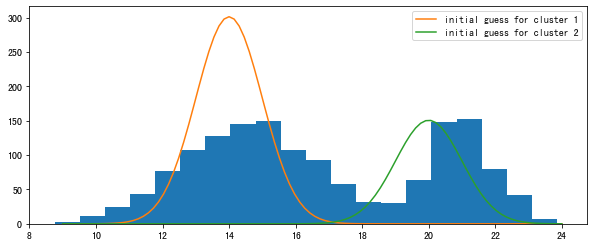

In [2]:
mu1=14
mu2=20
sigma1=sigma2=1
w1=w2=0.5
xs=np.linspace(9, 24, 100)
ax.plot(xs, norm.pdf(xs, loc=mu1, scale=sigma1)*sf1, label='initial guess for cluster 1')
ax.plot(xs, norm.pdf(xs, loc=mu2, scale=sigma2)*sf2, label='initial guess for cluster 2')
ax.legend()
fig

Let's consider the point midday, or 12. We can compute the membership of 12 in each cluster as follows:

The membership of $x$ in cluster $j$ is $$m_j(x)=\frac{f_j(x)w_j}{\sum_{i=1}^k f_i(x)w_i}$$
where $f_i(x)$ is the pdf of the normal distribution with mean = $\mu_i$ and standard deviation = $\sigma_i$

In [3]:
weighted_pdf_1=w1*norm.pdf(12, loc=mu1, scale=sigma1)
weighted_pdf_2=w2*norm.pdf(12, loc=mu2, scale=sigma2)
print(weighted_pdf_1, weighted_pdf_2)

0.02699548325659403 2.5261355417684464e-15


In [4]:
membership_1 = weighted_pdf_1/(weighted_pdf_1+weighted_pdf_2)
membership_2 = weighted_pdf_2/(weighted_pdf_1+weighted_pdf_2)
print(membership_1, membership_2)

0.9999999999999064 9.357622968839298e-14


In [5]:
def memberships(x, means=[mu1, mu2], stds=[sigma1, sigma2], ws=[w1, w2]):
    weighted_pdf_1=ws[0]*norm.pdf(x, loc=means[0], scale=stds[0])
    weighted_pdf_2=ws[1]*norm.pdf(x, loc=means[1], scale=stds[1])
    membership_1 = weighted_pdf_1/(weighted_pdf_1+weighted_pdf_2)
    membership_2 = weighted_pdf_2/(weighted_pdf_1+weighted_pdf_2)
    return(np.vstack([membership_1, membership_2]))

In [6]:
memberships(12)

array([[1.00000000e+00],
       [9.35762297e-14]])

In [7]:
memberships(22)

array([[9.35762297e-14],
       [1.00000000e+00]])

In [8]:
memberships(17)

array([[0.5],
       [0.5]])

In [10]:
norm.pdf(x, loc=mu1, scale=sigma1)

array([7.68245324e-02, 2.22770946e-01, 4.76316055e-02, ...,
       6.83594266e-11, 6.37228702e-07, 5.46923869e-10])

In [11]:
ms = memberships(x)

In [12]:
ms.shape

(2, 1500)

In [14]:
np.sum(ms, axis=1)

array([878.21389991, 621.78610009])

Based on these memberships, we will now calculate the new means. The new means will be a weighted sum of the points in the dataset, where the weighting  is based on the memberships we have just calculated.
$${\mu}_{j}^\prime= \frac{\sum_{x} m_j(x)x }{\sum_{x} m_j(x)  }$$
Compare with k-means: in k-means, memberships are just 1 or 0, and we calculate the new means by taking the average of all the points that have membership 1 in a cluster.

In [15]:
def calc_means(x, ms):
    denoms = np.sum(ms, axis=1)
    numtrs = np.sum(ms*x, axis=1)
    return numtrs/denoms

In [16]:
new_means= calc_means(x, ms)
print(new_means)

[14.12996613 20.40239905]


We now calculate the new standard deviations based on the memberships and the new means.

$${\sigma_j^\prime}^2=\frac{\sum_{x} m_j(x)(x-{\mu}_j^\prime)^2}{\sum_{x} m_j(x)}$$

In [17]:
def calc_stds(x, mus, ms):
    denoms = np.sum(ms, axis=1)
    numtrs = np.sum(ms*((x - mus.reshape(-1,1))**2), axis=1)
    return np.sqrt(numtrs/denoms)

In [18]:
new_stds = calc_stds(x, new_means, ms)
print(new_stds)

[1.67038545 1.56056397]


Finally, we calculate the new weights for each cluster
$$w_j^\prime=\frac{ \sum_{x} m_j(x) }{N}$$
where $N$ is the total number of points (in our case 1500)

In [19]:
def calc_ws(ms):
    return np.sum(ms, axis=1)/ms.shape[1]

In [22]:
calc_ws(ms)

array([0.58547593, 0.41452407])

Let's plot our updated curves:

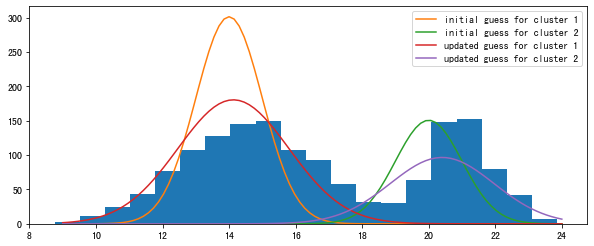

In [23]:
ax.plot(xs, norm.pdf(xs, loc=new_means[0], scale=new_stds[0])*sf1, label='updated guess for cluster 1')
ax.plot(xs, norm.pdf(xs, loc=new_means[1], scale=new_stds[1])*sf2, label='updated guess for cluster 2')
ax.legend()
fig

Now, we want to continue running all these steps until we see no more changes

In [24]:
mus=np.array([mu1, mu2])
sigmas=np.array([sigma1, sigma2])
ws=np.array([w1, w2])
convergence = False
while not convergence:
    ms = memberships(x, mus, sigmas, ws)
    new_mus = calc_means(x, ms)
    new_sigmas = calc_stds(x, new_mus, ms)
    new_ws = calc_ws(ms)
    convergence = np.allclose(mus, new_mus) and np.allclose(sigmas, new_sigmas) and np.allclose(ws, new_ws)
    mus = new_mus
    sigmas = new_sigmas
    ws = new_ws

In [25]:
mus

array([14.57559948, 21.00477774])

In [26]:
sigmas

array([2.00430176, 0.96305524])

In [27]:
ws

array([0.66489636, 0.33510364])

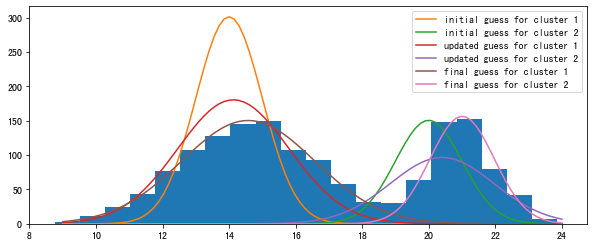

In [28]:
ax.plot(xs, norm.pdf(xs, loc=mus[0], scale=sigmas[0])*sf1, label='final guess for cluster 1')
ax.plot(xs, norm.pdf(xs, loc=mus[1], scale=sigmas[1])*sf2, label='final guess for cluster 2')
ax.legend()
fig

In [29]:
memberships(17, mus, sigmas, ws)

array([[9.99616915e-01],
       [3.83085160e-04]])